## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
#超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 68us/step - loss: 6.0534 - acc: 0.2658 - val_loss: 5.8923 - val_acc: 0.3232
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.8233 - acc: 0.3422 - val_loss: 5.7661 - val_acc: 0.3584
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.7204 - acc: 0.3693 - val_loss: 5.6806 - val_acc: 0.3806
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.6388 - acc: 0.3900 - val_loss: 5.6110 - val_acc: 0.3926
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.5691 - acc: 0.3989 - val_loss: 5.5412 - val_acc: 0.4066
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.5060 - acc: 0.4130 - val_loss: 5.4858 - val_acc: 0.4102
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.4470 - acc: 0.4205 - val_loss: 5.4415 - val_acc

50000/50000 [==============================] - 3s 62us/step - loss: 1.8965 - acc: 0.3358 - val_loss: 1.8511 - val_acc: 0.3495
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.8181 - acc: 0.3641 - val_loss: 1.7958 - val_acc: 0.3724
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7661 - acc: 0.3844 - val_loss: 1.7448 - val_acc: 0.3873
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7244 - acc: 0.3971 - val_loss: 1.7103 - val_acc: 0.3967
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6899 - acc: 0.4093 - val_loss: 1.6756 - val_acc: 0.4104
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6603 - acc: 0.4185 - val_loss: 1.6562 - val_acc: 0.4140
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6360 - acc: 0.4262 - val_loss: 1.6307 - val_acc: 0.4249
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 61us/step - loss: 1.7923 - acc: 0.3683 - val_loss: 1.7698 - val_acc: 0.3785
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7439 - acc: 0.3867 - val_loss: 1.7313 - val_acc: 0.3899
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7070 - acc: 0.4020 - val_loss: 1.6907 - val_acc: 0.4045
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6746 - acc: 0.4130 - val_loss: 1.6650 - val_acc: 0.4191
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6467 - acc: 0.4244 - val_loss: 1.6361 - val_acc: 0.4276
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6200 - acc: 0.4334 - val_loss: 1.6363 - val_acc: 0.4256
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5981 - acc: 0.4401 - val_loss: 1.5960 - val_acc: 0.4363
Epoch 10/50
50000/50000 [===========================

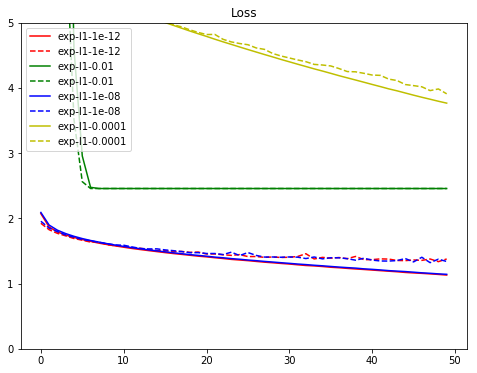

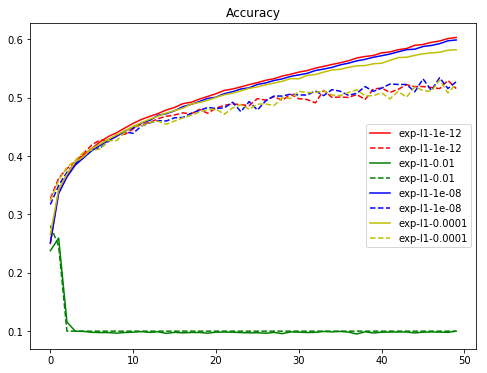

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()